In [303]:
# Importar librerías
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Carga y exploración del dataset

In [304]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [305]:
print(df.shape)

(920, 16)


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [307]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [308]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [309]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

## Análisis exploratorio

In [310]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [311]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [312]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [313]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [314]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [315]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [316]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# Limpieza de datos

In [317]:
# Eliminar columnas por gran cantidad de nulos y gran variabilidad
df = df.drop(['thal', 'ca', 'slope', 'id', 'chol', 'thalch', 'oldpeak'], axis=1)



In [318]:
df.head()

,age,sex,dataset,cp,trestbps,fbs,restecg,exang,num
0,63,Male,Cleveland,typical angina,145.0,True,lv hypertrophy,False,0
1,67,Male,Cleveland,asymptomatic,160.0,False,lv hypertrophy,True,2
2,67,Male,Cleveland,asymptomatic,120.0,False,lv hypertrophy,True,1
3,37,Male,Cleveland,non-anginal,130.0,False,normal,False,0
4,41,Female,Cleveland,atypical angina,130.0,False,lv hypertrophy,False,0


In [319]:
print(df['age'].describe())

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


In [320]:
print(df['trestbps'].describe())

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [321]:
# Rellenar nulos con la media
media_trestbps = df['trestbps'].mean()
df['trestbps'] = df['trestbps'].fillna(media_trestbps)
df['trestbps'].isnull().sum()

0

In [322]:
print(df['num'].describe())

count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64


In [323]:
df.head()

,age,sex,dataset,cp,trestbps,fbs,restecg,exang,num
0,63,Male,Cleveland,typical angina,145.0,True,lv hypertrophy,False,0
1,67,Male,Cleveland,asymptomatic,160.0,False,lv hypertrophy,True,2
2,67,Male,Cleveland,asymptomatic,120.0,False,lv hypertrophy,True,1
3,37,Male,Cleveland,non-anginal,130.0,False,normal,False,0
4,41,Female,Cleveland,atypical angina,130.0,False,lv hypertrophy,False,0


# Tratamiento de variables categóricas

In [324]:
# Mapear columna 'sex'
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [325]:
# Codificar la columna 'cp'
cp_dummies = pd.get_dummies(df['cp'], prefix='cp')

# Unir las columnas dummies al DataFrame original
df = pd.concat([df, cp_dummies], axis=1)

# Eliminar la columna original
df = df.drop('cp', axis=1)


df.head()

,age,sex,dataset,trestbps,fbs,restecg,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,Cleveland,145.0,True,lv hypertrophy,False,0,False,False,False,True
1,67,1,Cleveland,160.0,False,lv hypertrophy,True,2,True,False,False,False
2,67,1,Cleveland,120.0,False,lv hypertrophy,True,1,True,False,False,False
3,37,1,Cleveland,130.0,False,normal,False,0,False,False,True,False
4,41,0,Cleveland,130.0,False,lv hypertrophy,False,0,False,True,False,False


In [326]:
# Codificar la columna 'dataset'
cp_dummies = pd.get_dummies(df['dataset'], prefix='dataset')

# Unir las columnas dummies al DataFrame original
df = pd.concat([df, cp_dummies], axis=1)

# Eliminar la columna original
df = df.drop('dataset', axis=1)


df.head()

,age,sex,trestbps,fbs,restecg,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,63,1,145.0,True,lv hypertrophy,False,0,False,False,False,True,True,False,False,False
1,67,1,160.0,False,lv hypertrophy,True,2,True,False,False,False,True,False,False,False
2,67,1,120.0,False,lv hypertrophy,True,1,True,False,False,False,True,False,False,False
3,37,1,130.0,False,normal,False,0,False,False,True,False,True,False,False,False
4,41,0,130.0,False,lv hypertrophy,False,0,False,True,False,False,True,False,False,False


In [327]:
# Imputar columnas 'fbs' y 'exang' manteniendo el porcentaje de 0s y 1s
def imputar_binaria_con_proporcion(serie):
    proporcion = serie.value_counts(normalize=True)
    n_nulos = serie.isnull().sum()

    # Generar nuevos valores manteniendo la distribución
    nuevos_valores = np.random.choice(
        proporcion.index,  # normalmente [0, 1]
        size=n_nulos,
        p=proporcion.values
    )

    # Copiar la serie original
    serie_imputada = serie.copy()

    # Reemplazar los nulos
    serie_imputada[serie_imputada.isnull()] = nuevos_valores

    return serie_imputada

df['fbs'] = imputar_binaria_con_proporcion(df['fbs'])
df['exang'] = imputar_binaria_con_proporcion(df['exang'])

df.head()

,age,sex,trestbps,fbs,restecg,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,63,1,145.0,True,lv hypertrophy,False,0,False,False,False,True,True,False,False,False
1,67,1,160.0,False,lv hypertrophy,True,2,True,False,False,False,True,False,False,False
2,67,1,120.0,False,lv hypertrophy,True,1,True,False,False,False,True,False,False,False
3,37,1,130.0,False,normal,False,0,False,False,True,False,True,False,False,False
4,41,0,130.0,False,lv hypertrophy,False,0,False,True,False,False,True,False,False,False


In [328]:
# Codificar la columna 'restecg'
df = pd.get_dummies(df, columns=['restecg'], prefix='restecg', drop_first=True)
df.head()

,age,sex,trestbps,fbs,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,restecg_normal,restecg_st-t abnormality
0,63,1,145.0,True,False,0,False,False,False,True,True,False,False,False,False,False
1,67,1,160.0,False,True,2,True,False,False,False,True,False,False,False,False,False
2,67,1,120.0,False,True,1,True,False,False,False,True,False,False,False,False,False
3,37,1,130.0,False,False,0,False,False,True,False,True,False,False,False,True,False
4,41,0,130.0,False,False,0,False,True,False,False,True,False,False,False,False,False


In [329]:
# Convertir todas las columnas tipo bool a int (1/0)
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

df['fbs'] = df['fbs'].copy().astype(int)
df['exang'] = df['exang'].copy().astype(int)

In [330]:
df.head()

,age,sex,trestbps,fbs,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,restecg_normal,restecg_st-t abnormality
0,63,1,145.0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,67,1,160.0,0,1,2,1,0,0,0,1,0,0,0,0,0
2,67,1,120.0,0,1,1,1,0,0,0,1,0,0,0,0,0
3,37,1,130.0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,0,0,0,0,1,0,0,1,0,0,0,0,0


# Análisis visual

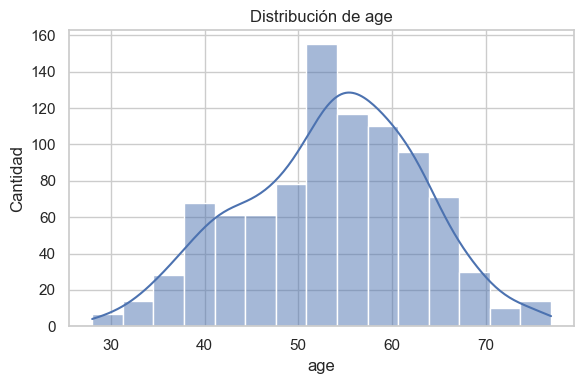

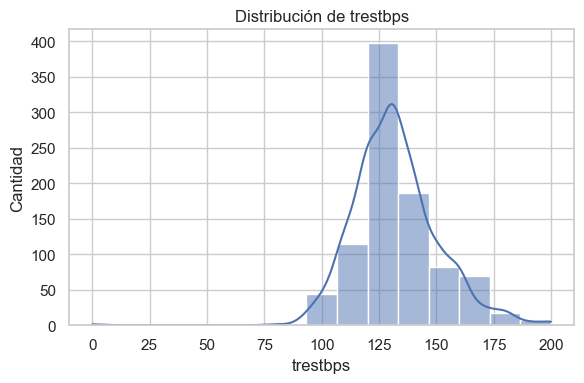

In [331]:
columnas_numericas = ['age', 'trestbps']

for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=15, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.show()


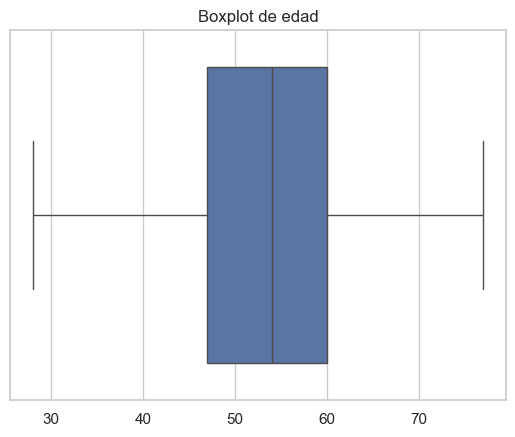

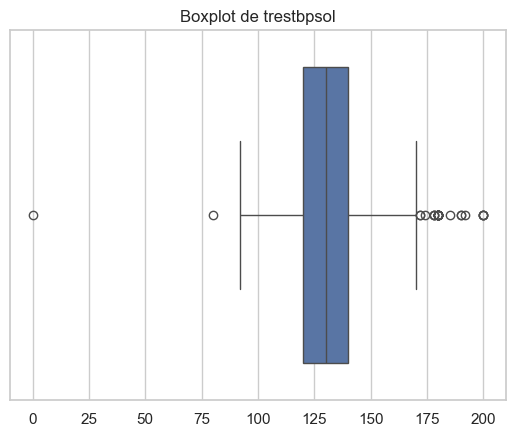

In [332]:
# Boxplots
sns.boxplot(data=df, x='age')
plt.title('Boxplot de edad')
plt.xlabel('')
plt.show()

sns.boxplot(data=df, x='trestbps')
plt.title('Boxplot de trestbpsol')
plt.xlabel('')
plt.show()

In [333]:
# Quitar el dato = 0
df = df[df['trestbps'] != 0]

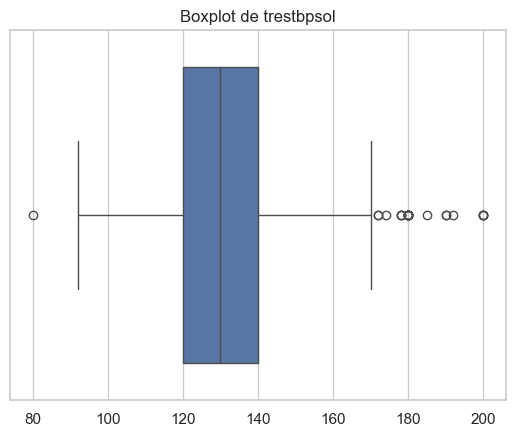

In [334]:
sns.boxplot(data=df, x='trestbps')
plt.title('Boxplot de trestbpsol')
plt.xlabel('')
plt.show()

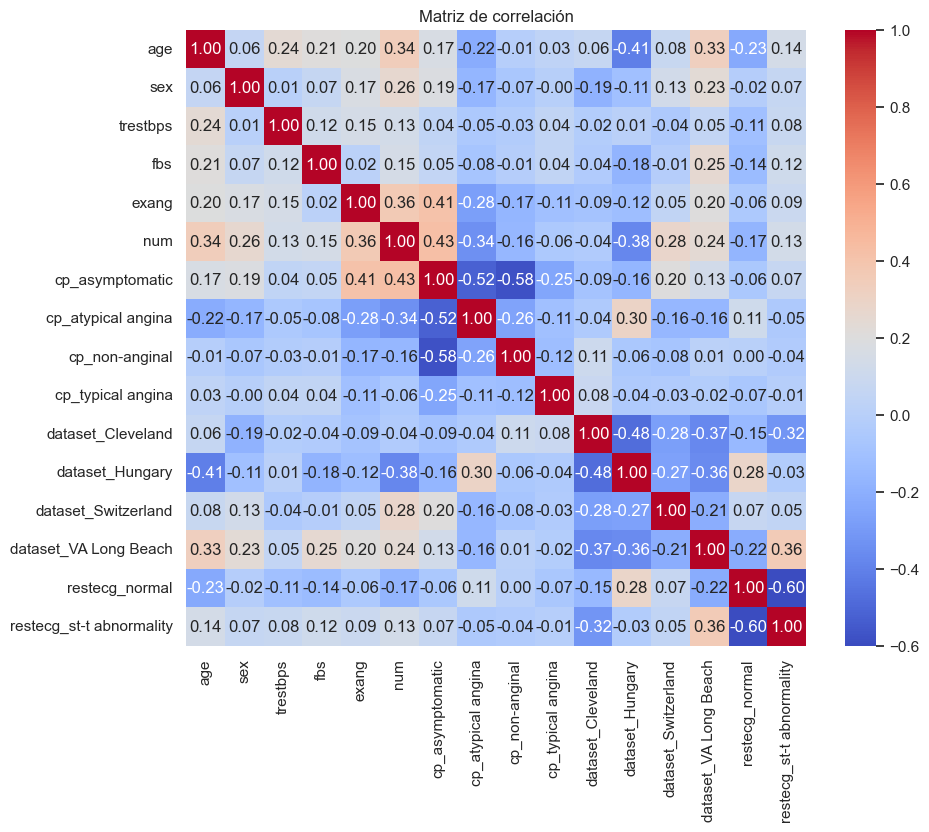

In [335]:
# Correlación con el target
correlaciones = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [336]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [337]:
# Unir los tipos de enfermedades en uno
df['num'] = df['num'].replace({2: 1, 3: 1, 4: 1})

C:\Users\usuario\AppData\Local\Temp\ipykernel_12080\2239510176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Set2')


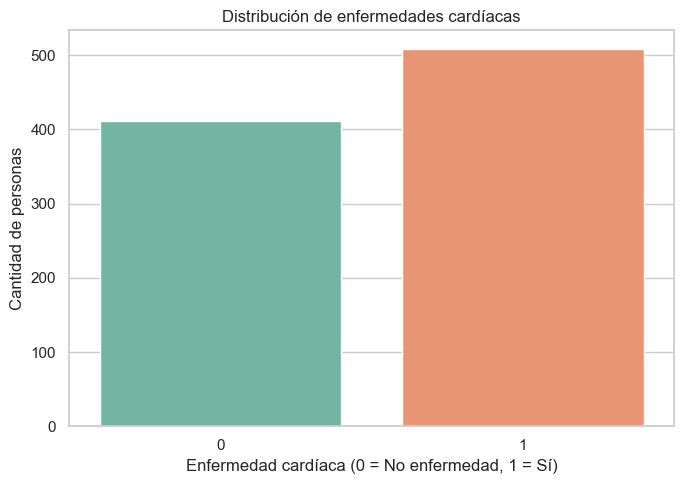

In [338]:
# Visualización de la distribución de la clase target
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x='num', data=df, palette='Set2')
plt.title('Distribución de enfermedades cardíacas')
plt.xlabel('Enfermedad cardíaca (0 = No enfermedad, 1 = Sí)')
plt.ylabel('Cantidad de personas')
plt.tight_layout()
plt.show()

In [339]:
df['num'].value_counts()

num
1    508
0    411
Name: count, dtype: int64

In [340]:
df.head()

,age,sex,trestbps,fbs,exang,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,restecg_normal,restecg_st-t abnormality
0,63,1,145.0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,67,1,160.0,0,1,1,1,0,0,0,1,0,0,0,0,0
2,67,1,120.0,0,1,1,1,0,0,0,1,0,0,0,0,0
3,37,1,130.0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,0,0,0,0,1,0,0,1,0,0,0,0,0


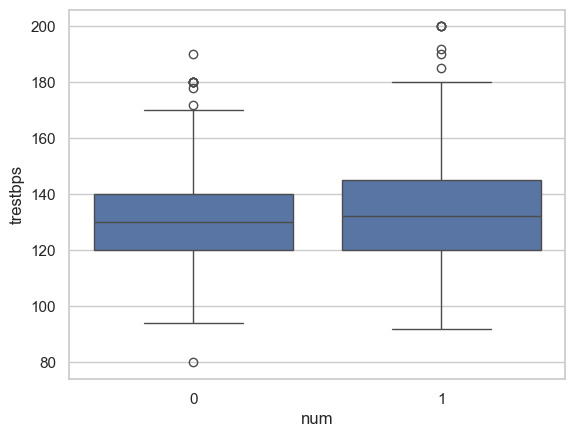

In [341]:
sns.boxplot(x='num', y='trestbps', data=df)
plt.title('')
plt.show()

# Modelado

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar variables independientes (X) y dependiente (y)
X = df.drop('num', axis=1)
y = df['num']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional pero útil para algunos modelos como KNN y Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predicción
y_pred_lr = model_lr.predict(X_test)

# Evaluación
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71        75
           1       0.81      0.76      0.79       109

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



In [344]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar el número de vecinos
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        75
           1       0.88      0.79      0.83       109

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [345]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        75
           1       0.84      0.73      0.78       109

    accuracy                           0.76       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.77      0.76      0.76       184



In [346]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        75
           1       0.84      0.79      0.82       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.79      0.79       184



# Evaluación

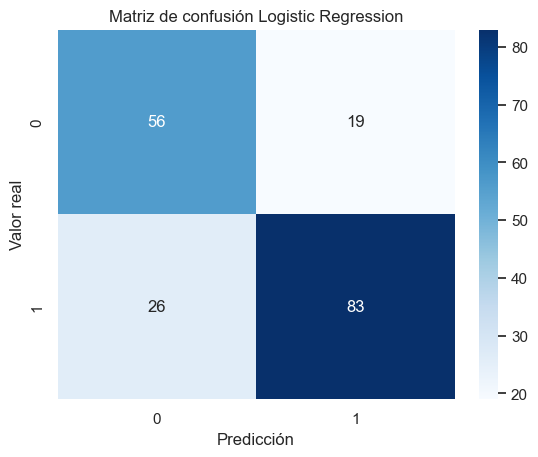

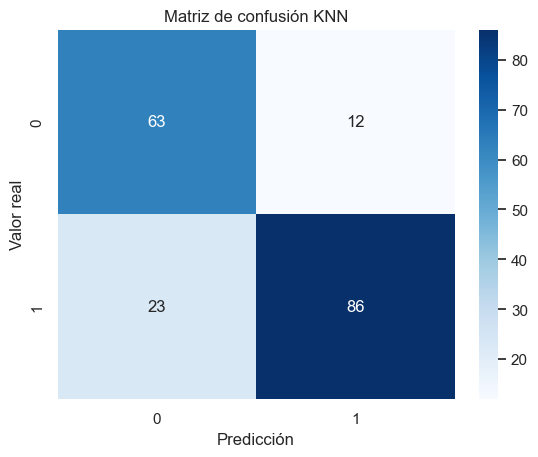

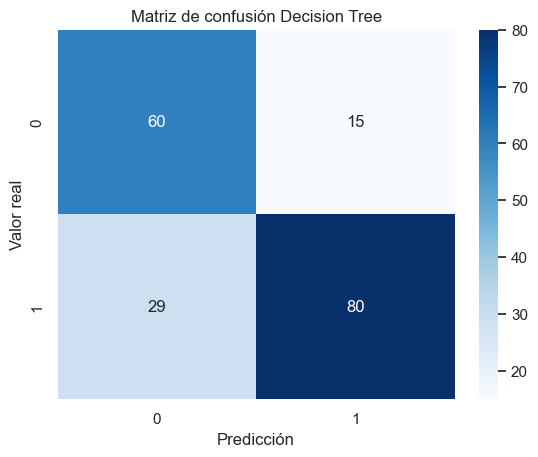

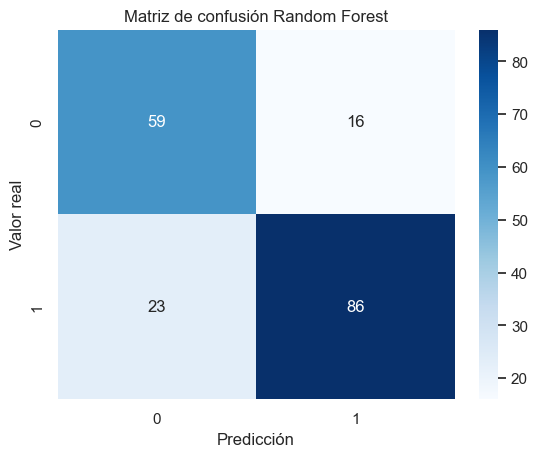

In [347]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión Logistic Regression")
plt.show()

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión KNN")
plt.show()

cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión Decision Tree")
plt.show()

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión Random Forest")
plt.show()

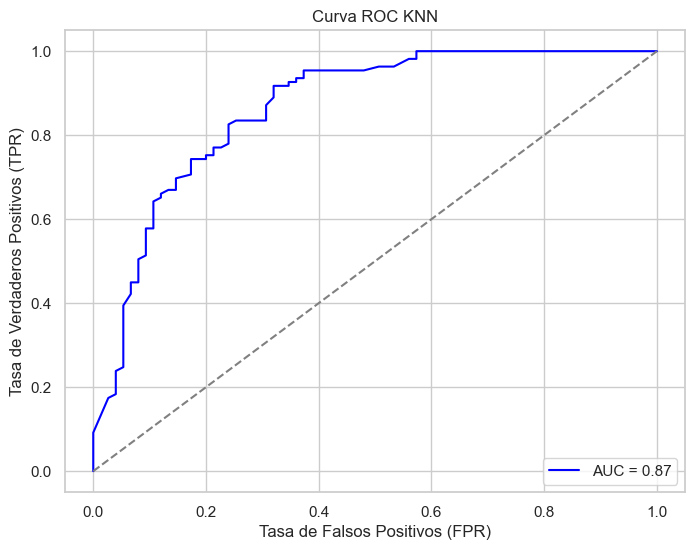

In [348]:
# Curva ROC y AUC
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 📝 Comentario interpretativo – Evaluación de modelos

Tras probar varios modelos de clasificación (Regresión Logística, KNN, Árbol de Decisión y Random Forest), el algoritmo que obtuvo el **mejor rendimiento global** fue **K-Nearest Neighbors (KNN)**.

### 🔹 Métricas clave del modelo KNN:
- **Accuracy:** 82%
- **Precision clase 1 (enfermos):** 88%
- **Recall clase 1:** 81%
- **F1-score clase 1:** 0.84

Esto indica que el modelo **detectó correctamente a la mayoría de las personas con enfermedad cardíaca** (alto recall) y que **la mayoría de sus predicciones positivas fueron acertadas** (alta precisión).

Además, la curva ROC del modelo KNN mostró un **AUC elevado**, reflejando un buen balance entre la tasa de verdaderos positivos y la tasa de falsos positivos.

---

### ✅ Conclusión:
KNN resultó ser el modelo más efectivo para este caso, ya que logró un buen equilibrio entre **precisión y sensibilidad**, algo fundamental en problemas de salud donde los falsos negativos (no detectar una enfermedad real) pueden tener consecuencias graves.

# Predicción

In [352]:
random_index = np.random.randint(0, len(X_test))
random_sample = X_test[random_index].reshape(1, -1)

prediction = model_knn.predict(random_sample)
print("Predicción:", prediction[0])

Predicción: 0


In [353]:
# Suponiendo que ya hiciste train_test_split antes...
X_original = df.drop('num', axis=1)
y_original = df['num']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Mostrar los datos originales del paciente correspondiente
print("Datos reales del paciente (sin escalar):")
print(X_test_orig.iloc[random_index])

# Mostrar la predicción y el valor real
print("Predicción del modelo:", prediction[0])
print("Valor real:", y_test.iloc[random_index])


Datos reales del paciente (sin escalar):
age                          47.0
sex                           0.0
trestbps                    120.0
fbs                           0.0
exang                         1.0
cp_asymptomatic               1.0
cp_atypical angina            0.0
cp_non-anginal                0.0
cp_typical angina             0.0
dataset_Cleveland             0.0
dataset_Hungary               1.0
dataset_Switzerland           0.0
dataset_VA Long Beach         0.0
restecg_normal                1.0
restecg_st-t abnormality      0.0
Name: 585, dtype: float64
Predicción del modelo: 0
Valor real: 1
